In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving default of credit card clients.xlsx to default of credit card clients.xlsx


**Data Preprocessing**

In [ ]:
!pip install pandas xlrd

In [ ]:
df = pd.read_excel('default of credit card clients.xlsx', sheet_name="Data")

In [ ]:
print(df.head())

  Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1      20000    2          2         1   24      2      2     -1   
2          2     120000    2          2         2   26     -1      2      0   
3          3      90000    2          2         2   34      0      0      0   
4          4      50000    2          2         1   37      0      0      0   

      X9  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -1  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   
3      0  ...      14331      14948      15549      1518      1500      1000   
4      0  ...      28314      28959      29547      2000      2019      1200   

        X21       X22       X23             

In [ ]:
missing_values_sum = df.isnull().sum()
print(missing_values_sum)


Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64


In [ ]:
data_types = df.dtypes
print(data_types)

Unnamed: 0    object
X1            object
X2            object
X3            object
X4            object
X5            object
X6            object
X7            object
X8            object
X9            object
X10           object
X11           object
X12           object
X13           object
X14           object
X15           object
X16           object
X17           object
X18           object
X19           object
X20           object
X21           object
X22           object
X23           object
Y             object
dtype: object


In [ ]:
missing_entry_sum = df.isna().sum()
print(missing_entry_sum)

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64


Exploratory Data Analysis

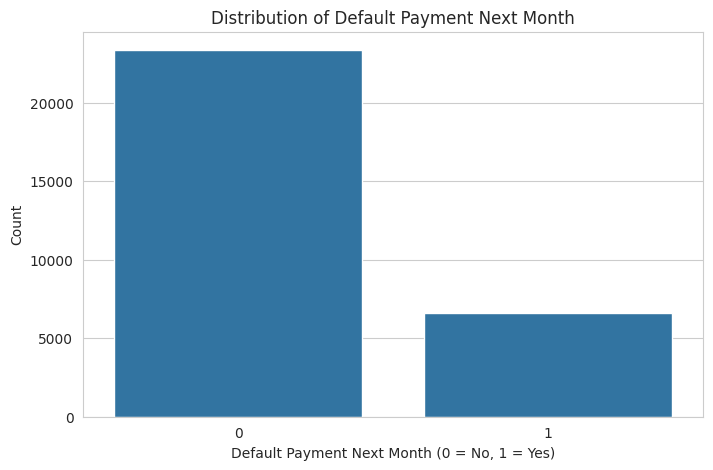

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plot the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='default payment next month', data=df)
plt.title('Distribution of Default Payment Next Month')
plt.xlabel('Default Payment Next Month (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


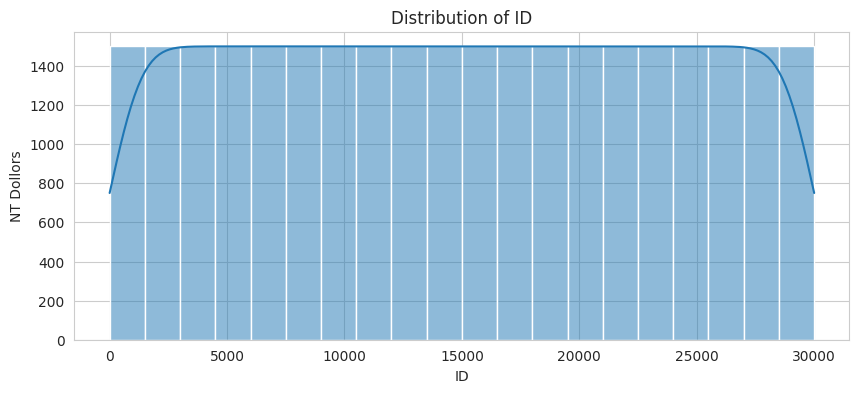

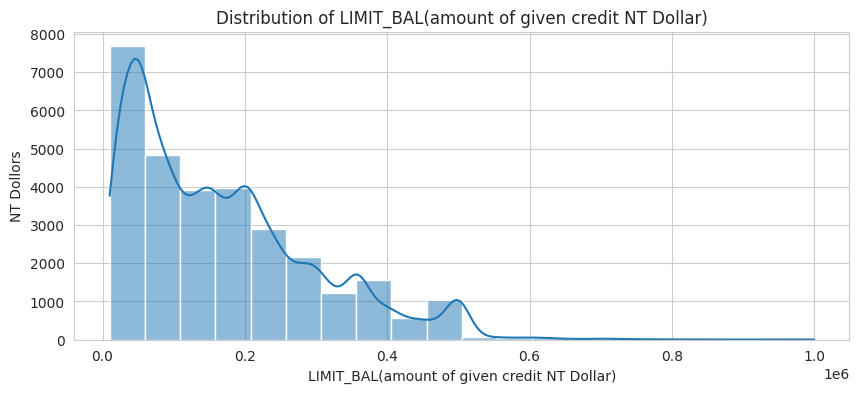

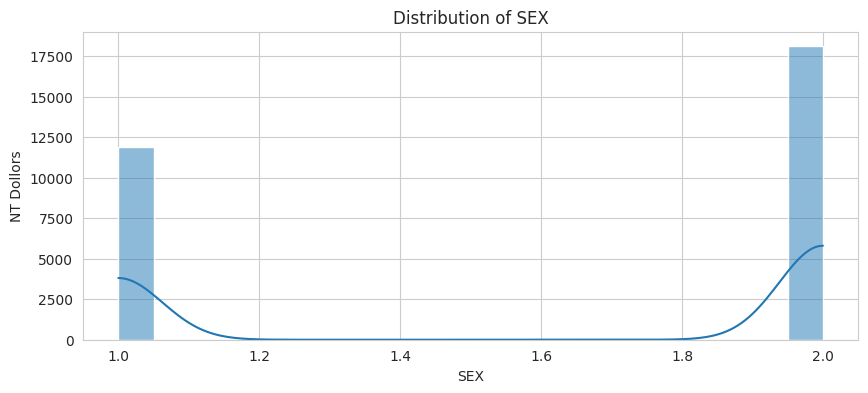

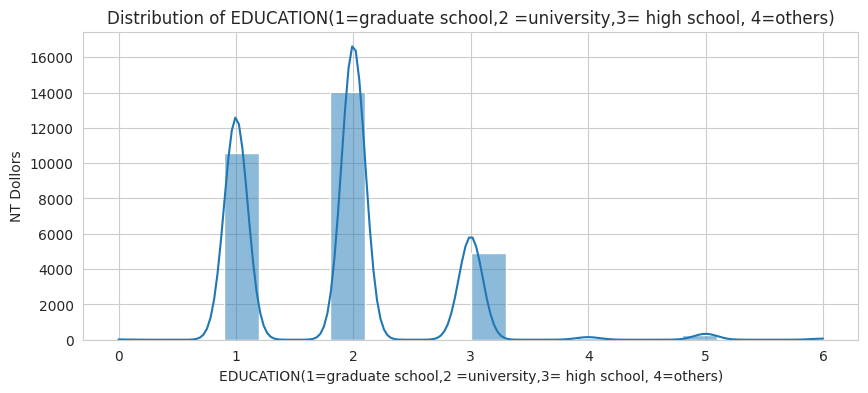

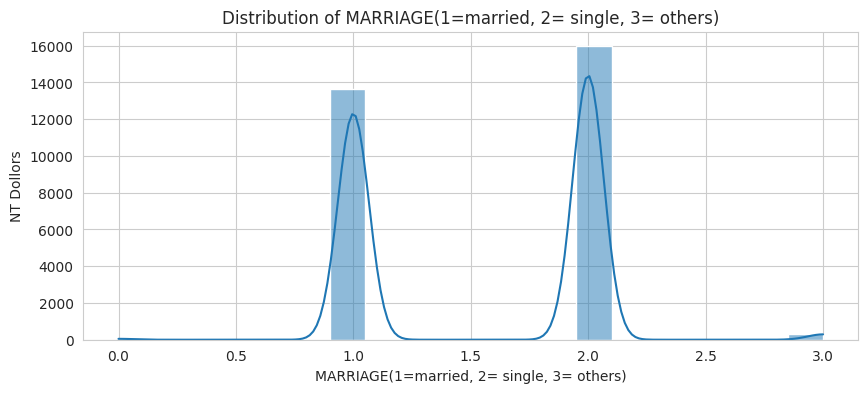

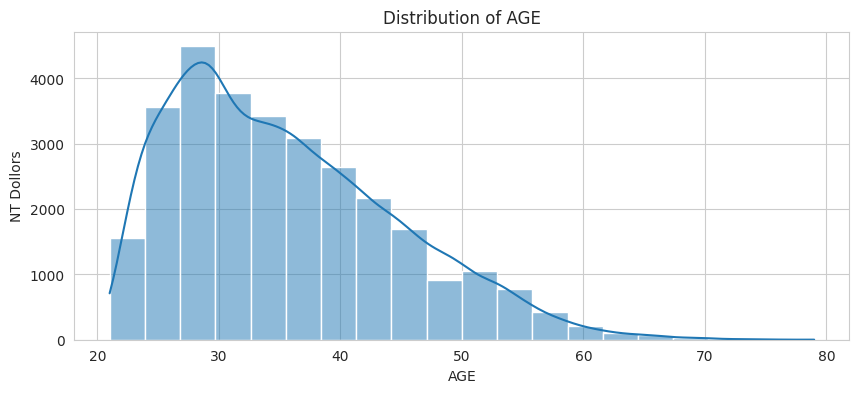

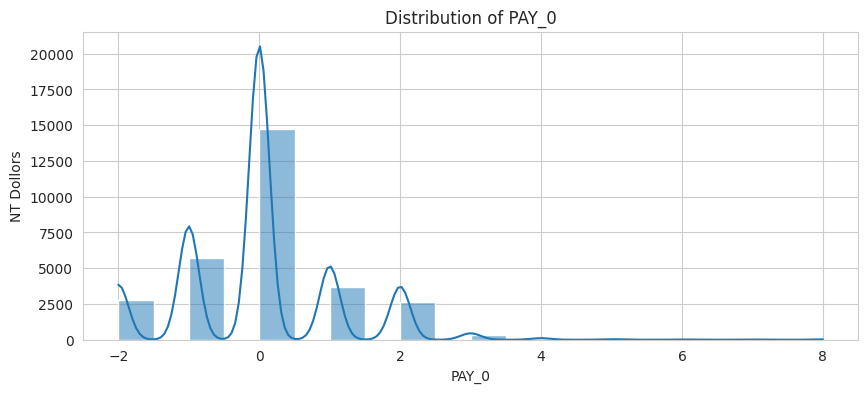

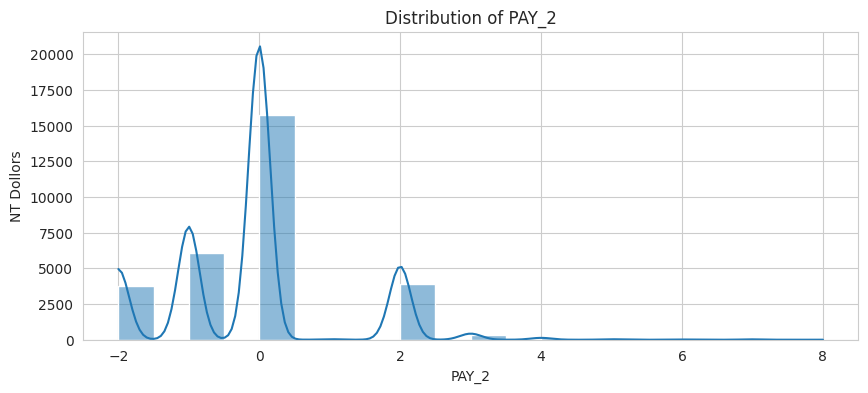

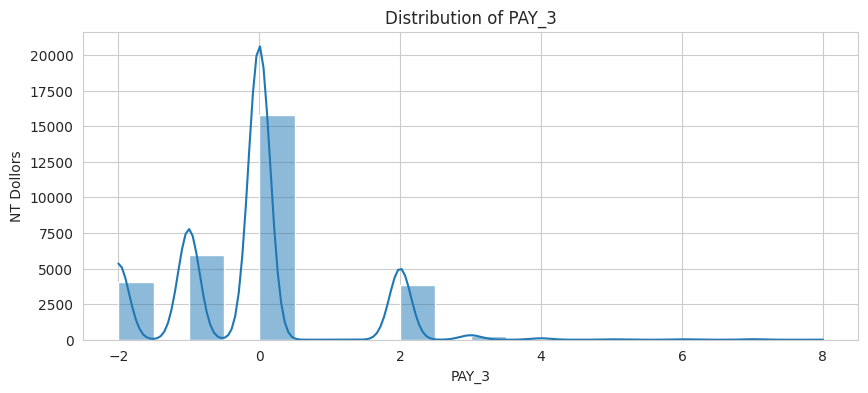

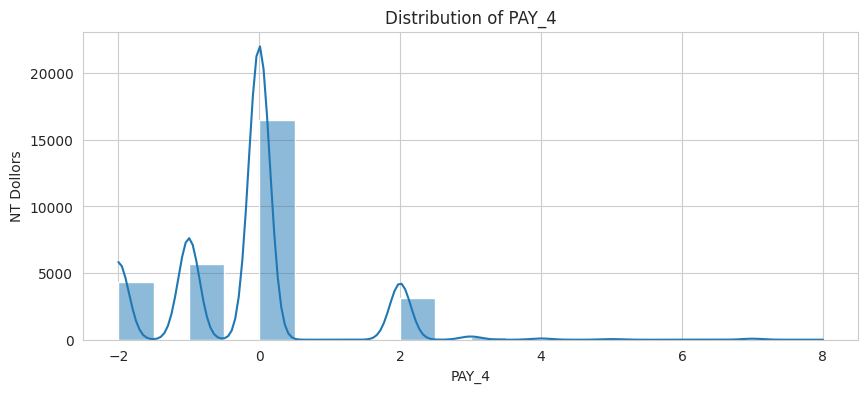

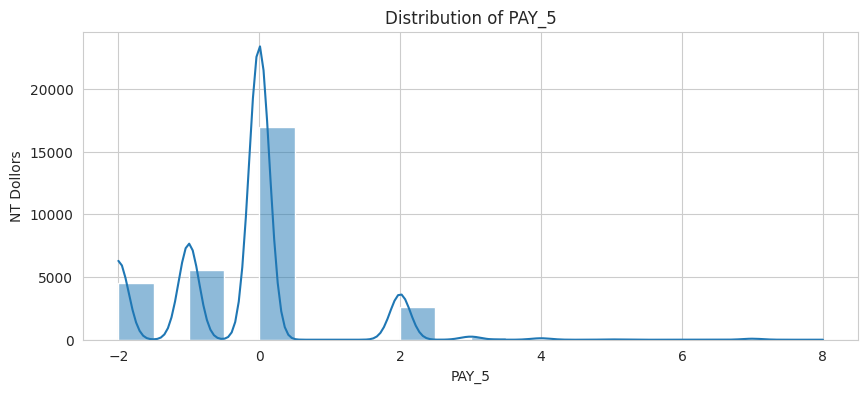

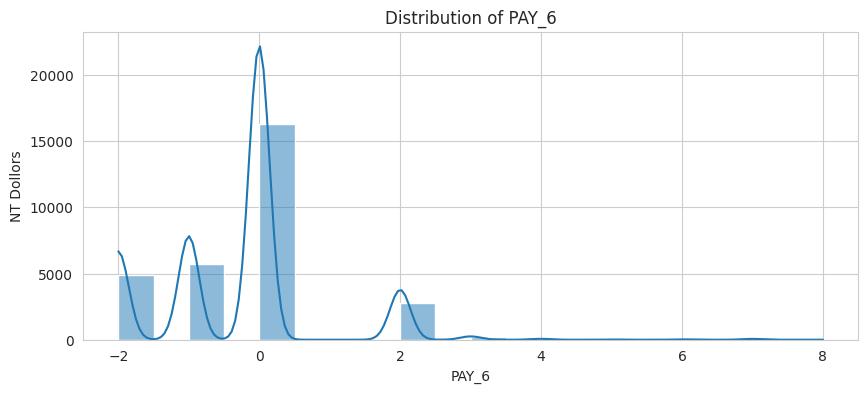

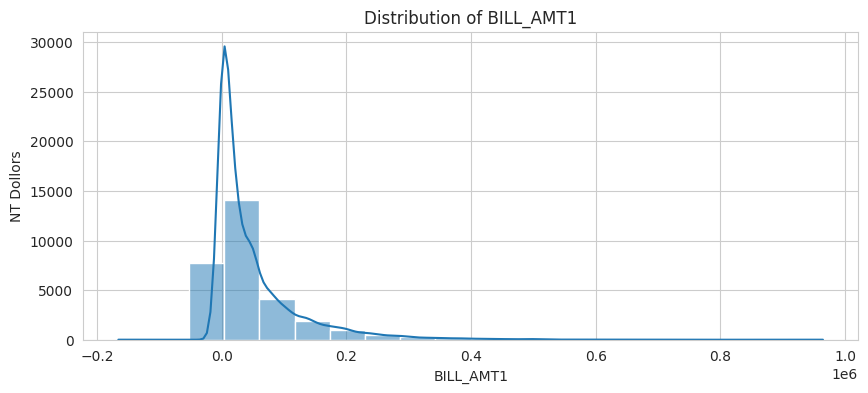

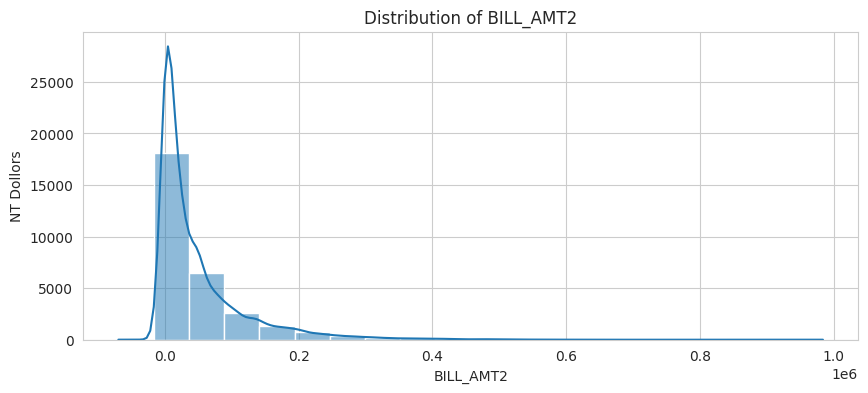

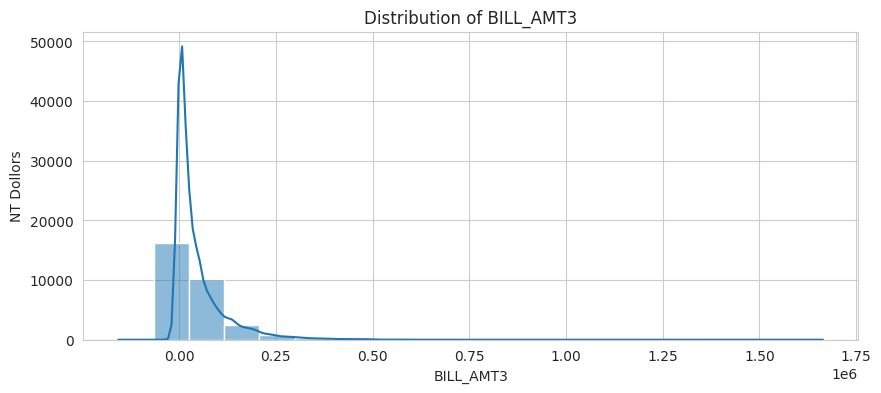

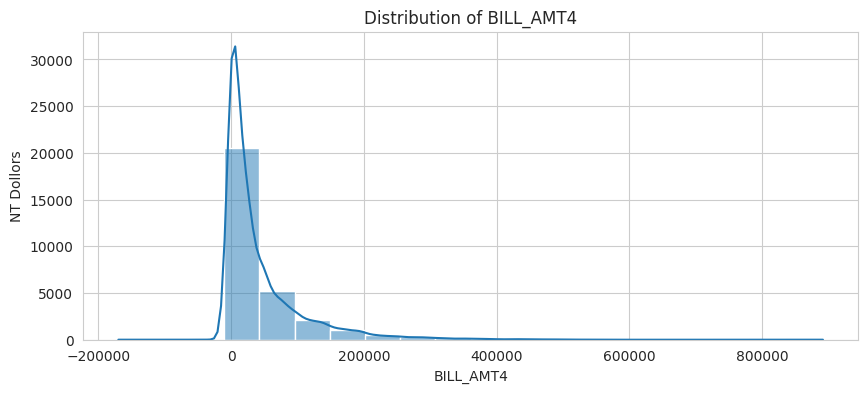

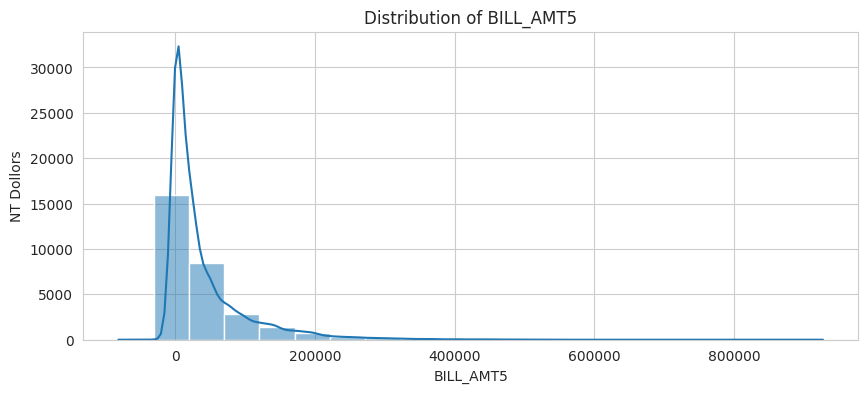

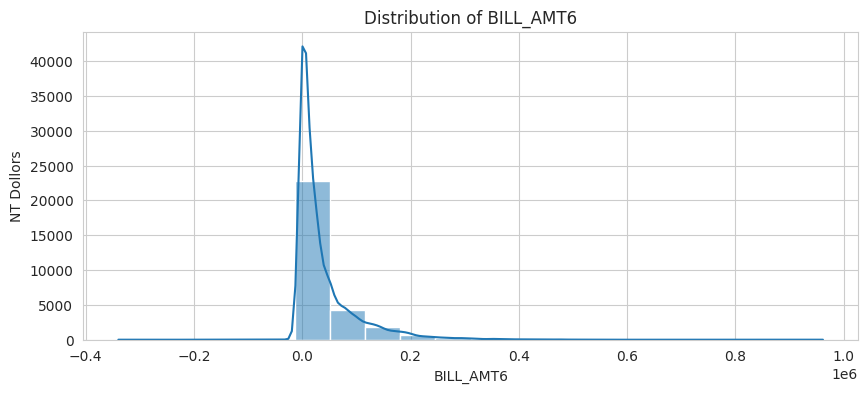

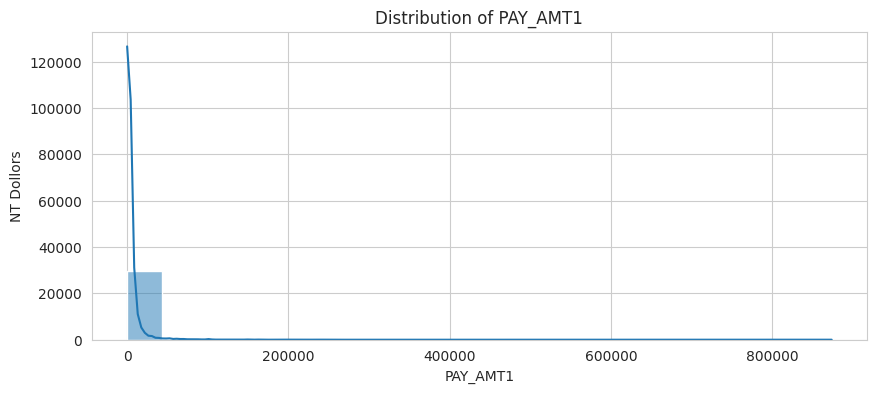

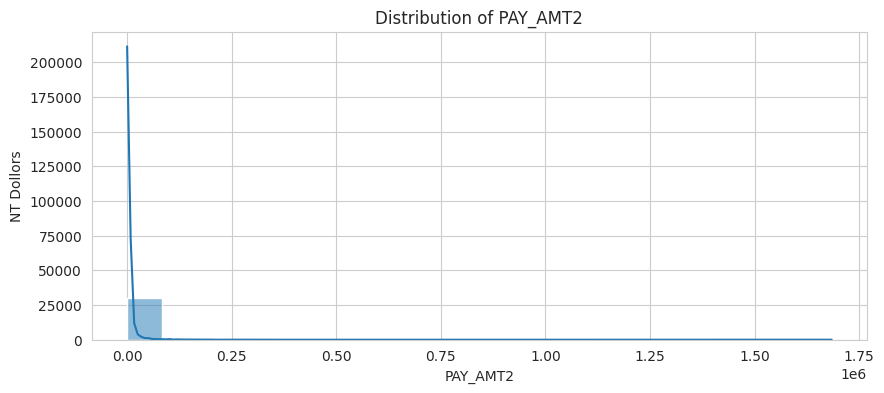

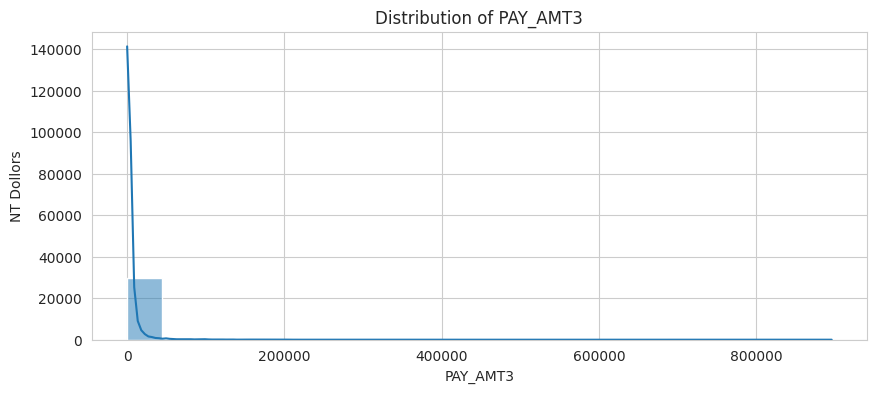

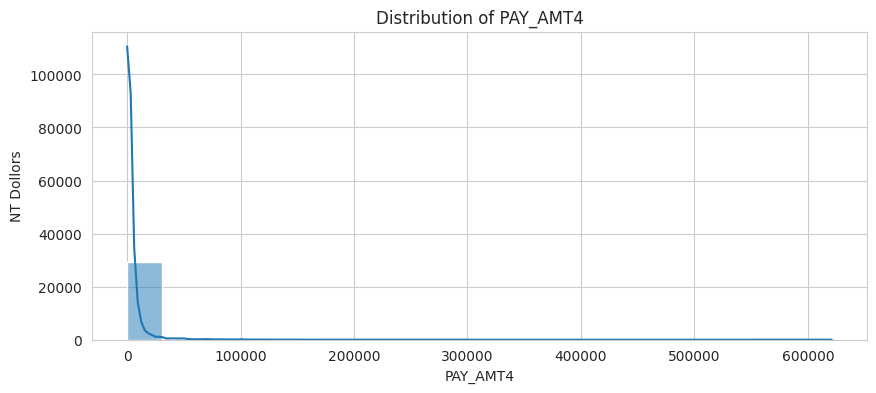

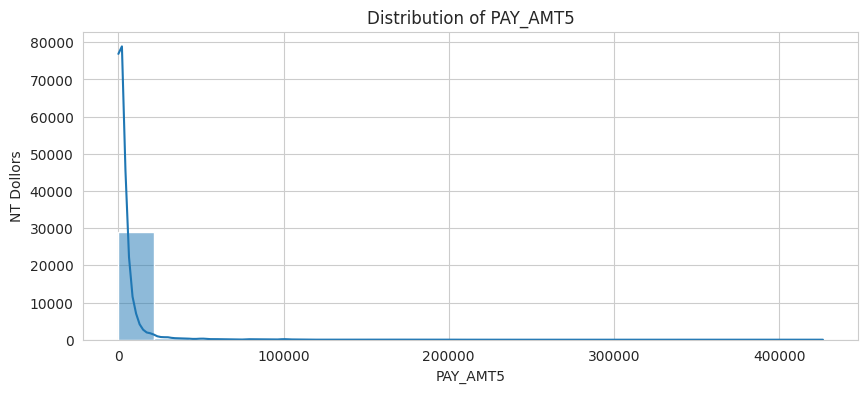

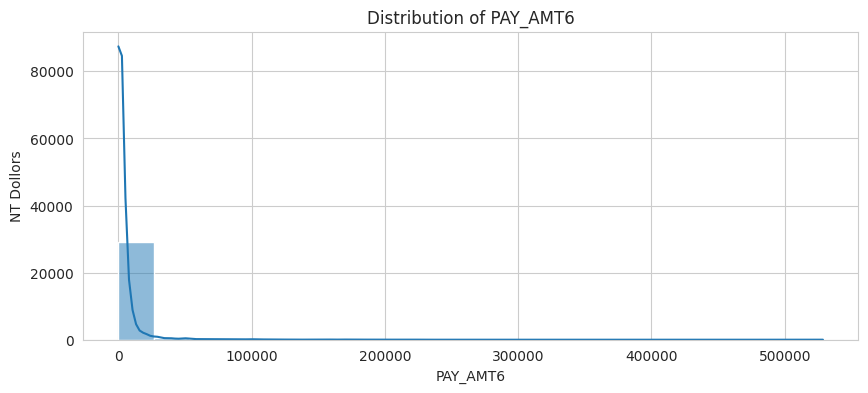

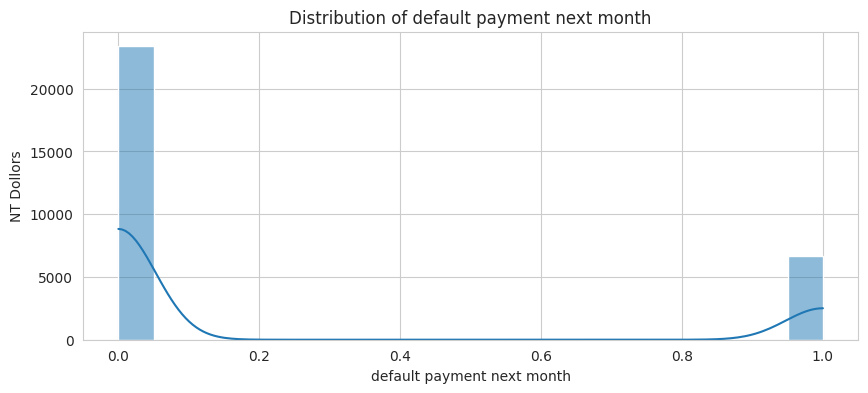

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Select numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plot histograms for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=feature, kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('NT Dollors')
    plt.show()


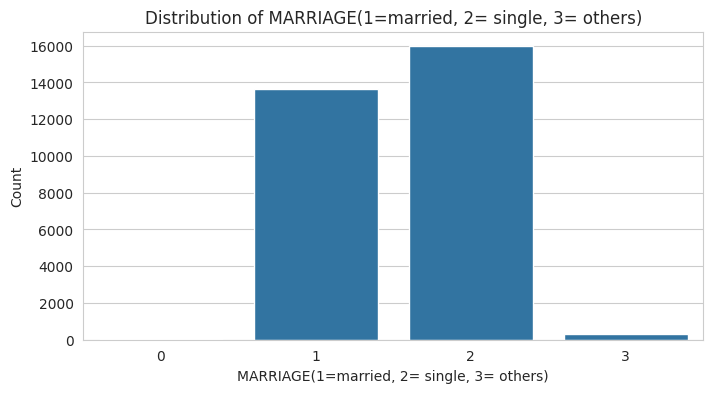

In [ ]:
# Assuming 'MARRIAGE' is a categorical feature, you can adapt this for any other categorical features.
categorical_features = ['MARRIAGE(1=married, 2= single, 3= others)']  # Add other categorical feature names as needed

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
X = df.drop('default payment next month', axis=1)
y = df['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

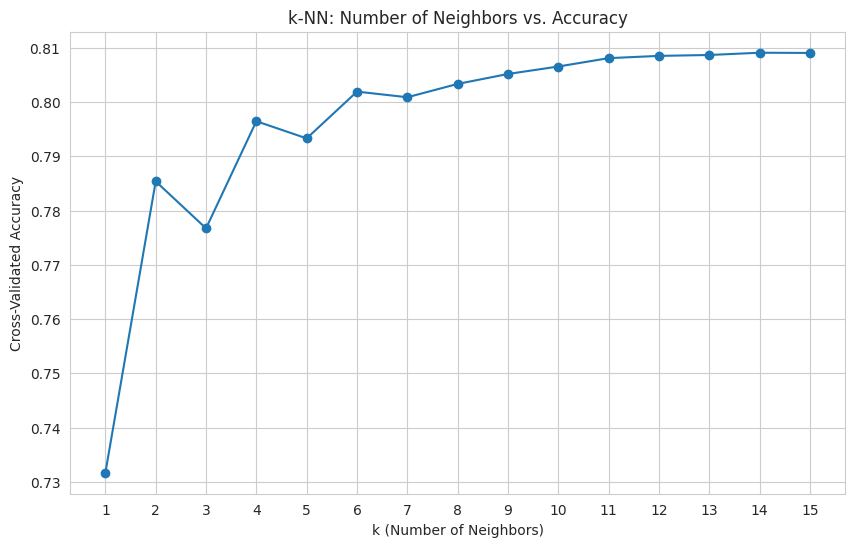

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train_scaled and y_train are your scaled training features and labels

# Range of k values to try
k_values = range(1, 16)

# List to store mean cross-validated accuracy for each k
mean_cv_scores = []

# Loop over values of k
for k in k_values:
    # Initialize the k-NN classifier with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Perform cross-validation and store the mean accuracy
    # Here, we use len(X_train_scaled) to ensure we do not exceed the number of samples
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=min(10, len(X_train_scaled)), scoring='accuracy')
    mean_cv_scores.append(np.mean(cv_scores))

# Plot the mean accuracy scores for each k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_cv_scores, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('k-NN: Number of Neighbors vs. Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming optimal_k is determined from your previous analysis
optimal_k = 2  # Example value; replace with your optimal k value

# Initialize the k-NN classifier with the optimal k value
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# Fit the model on the training data
knn_optimal.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn_optimal.predict(X_test_scaled)

# Calculate the accuracy score
accuracy_optimal = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f'Accuracy of the k-NN model with k={optimal_k}: {accuracy_optimal:.2f}')


Accuracy of the k-NN model with k=2: 0.79


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Assuming y_test is your true labels and y_pred are the predicted labels from your model
# For ROC-AUC, you need the probability estimates of the positive class, which we'll assume are stored in y_pred_proba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsClassifier(n_neighbors=3)  # Adjust n_neighbors as needed
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # For ROC-AUC score

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

Accuracy: 0.7743
F1 Score: 0.4154
Precision: 0.4796
Recall: 0.3663
ROC-AUC: 0.6719
